In [1]:
import pandas as pd
import tensorflow as tf
import datetime
import numpy as np
from matplotlib import pyplot as plt

# Carrega a extensão TensorBoard
%load_ext tensorboard

print("Tensor Flow Version:", tf.__version__)
print("Keras Version:", tf.keras.__version__)

Tensor Flow Version: 2.0.0
Keras Version: 2.2.4-tf


In [2]:
#@title Função para criar o modelo
def build_model(my_learning_rate):
    """
    Cria e compila um modelo de regressão linear.
    
    Arguments:
    my_learning_rate -- a taxa de aprendizagem
    
    Returns:
    model -- o modelo compilado
    """
    # O modelo mais simples de tf.keras é o sequencial
    # O modelo sequencial pode conter uma ou mais camadas
    model = tf.keras.models.Sequential()
    
    # Topografia do modelo
    # Duas camadas escondidas, cada uma com 3 unidades
    # A camada de output só tem uma unidade (visto que só queremos
    # prever um único valor) e não usa nenhuma função de activação
    model.add(tf.keras.layers.Dense(units=3, activation="tanh", input_shape=(1,)))
    model.add(tf.keras.layers.Dense(units=3, activation="tanh"))
    model.add(tf.keras.layers.Dense(1))
    
    
    # Compilar a topografia do modelo
    # Configurar o treino para minimizar o erro quadrático médio
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model           

#@title Função para treinar o modelo
def train_model(model, feature, label, epochs, batch_size):
    """
    Treina o modelo de acordo com os dados de entrada
    
    Arguments:
    model -- o modelo a ser treinado
    feature -- um array de features (os valores x)
    label -- um array de labels (os valores y = f(x))
    epochs -- numero de epocas de treino
    batch_size -- tamanho do batch
    
    Returns:
    epochs -- Lista de épocas
    rmse -- Raíz quadrada do erro quadrático médio
    """
    
    # Preparar uma diretoria de logs para ser usada pelo tensorboard
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Passa os valores das features e os valores das labels
    # para o modelo. O modelo vai treinar durante o número
    # de epochs especificado e gradualmente vai aprendendo
    # como é que os valores das features se relacionam com
    # os valores das labels
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[tensorboard_callback])
        
    # A lista das epocas e guardada em separado
    epochs = history.epoch
    
    # Faz um snapshot do historico de cada epoca
    hist = pd.DataFrame(history.history)

    # Recolhe especificamente a raiz quadrada do erro quadrático médio
    # em cada epoca
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse

print("Definidas as funções create_model e train_model")

Definidas as funções create_model e train_model


In [3]:
#@title Gráfico para mostrar o modelo treinado
def plot_the_model(feature, label, preds):
    """
    Gráfico que mostra o modelo treinado contra as features e labels
    
    Arguments:
    feature -- array de features que passámos à rede para treino
    label -- array de labels correspondentes às features
    preds -- array de valores previstos pelo modelo
    """
    
    # Nomes para os eixos
    plt.xlabel("feature")
    plt.ylabel("label")
    
    # Valores das features vs. valores das labels
    plt.scatter(feature, label)
    
    # Cria uma representação a encarnado do modelo.
    plt.plot(feature, preds, 'r--')
    
    # Faz o render do scatter plot e da linha encarnada
    plt.show()

#@title Gráfico para mostrar o rmse vs. epochs
def plot_the_loss_curve(epochs, rmse):
    """
    Gráfico da curva de perda (loss vs. epoch)
    
    Arguments:
    epochs -- número de épocas
    rms -- erro quadrático médio
    
    """
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Definidas as funções plot_the_model e plot_the_loss_curve.")

Definidas as funções plot_the_model e plot_the_loss_curve.


In [4]:
def draw_points(n, func):
    """
    Constroi conjuntos de dados de acordo com a função escolhida
    
    Arguments:
    n -- Total de pontos
    func -- Tipo de função (Aceita: sin, power_two, abs, heaviside)
    
    Returns:
    feature -- Um array com as features (valores de x)
    label -- Um array com as labels (valores de y = f(x))
    """
    feature = np.sort(np.random.uniform(-1, 1, n))
    if func == 'sin':
        label = np.sin(feature)
    elif func == 'power_two':
        label = np.power(feature, 2)
    elif func == 'abs':
        label = np.abs(feature)
    elif func == 'heaviside':
        label = np.heaviside(feature, 0)
    else:
        print("Erro")
        return 0, 0
        
    return feature, label    

In [5]:
# my_feature, my_label = draw_points(50, func='power_two')
# my_feature, my_label = draw_points(50, func='sin')
# my_feature, my_label = draw_points(50, func='abs')
my_feature, my_label = draw_points(50, func='heaviside')


In [6]:
# Limpa os logs das iterações anteriores
!rm -rf ./logs/ 
    
#Hyper parametros
learning_rate=0.01
epochs=200
my_batch_size=20

my_model = build_model(learning_rate)
epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

Train on 50 samples
Epoch 1/200
50/50 [==============================] - 1s 24ms/sample - loss: 0.3718 - root_mean_squared_error: 0.6098
Epoch 2/200
50/50 [==============================] - 0s 358us/sample - loss: 0.1775 - root_mean_squared_error: 0.4213
Epoch 3/200
50/50 [==============================] - 0s 341us/sample - loss: 0.1193 - root_mean_squared_error: 0.3454
Epoch 4/200
50/50 [==============================] - 0s 519us/sample - loss: 0.0859 - root_mean_squared_error: 0.2931
Epoch 5/200
50/50 [==============================] - 0s 368us/sample - loss: 0.0674 - root_mean_squared_error: 0.2595
Epoch 6/200
50/50 [==============================] - 0s 501us/sample - loss: 0.0575 - root_mean_squared_error: 0.2398
Epoch 7/200
50/50 [==============================] - 0s 307us/sample - loss: 0.0530 - root_mean_squared_error: 0.2303
Epoch 8/200
50/50 [==============================] - 0s 478us/sample - loss: 0.0492 - root_mean_squared_error: 0.2218
Epoch 9/200
50/50 [==================

50/50 [==============================] - 0s 520us/sample - loss: 0.0274 - root_mean_squared_error: 0.1655
Epoch 70/200
50/50 [==============================] - 0s 478us/sample - loss: 0.0276 - root_mean_squared_error: 0.1662
Epoch 71/200
50/50 [==============================] - 0s 392us/sample - loss: 0.0287 - root_mean_squared_error: 0.1693
Epoch 72/200
50/50 [==============================] - 0s 341us/sample - loss: 0.0291 - root_mean_squared_error: 0.1705
Epoch 73/200
50/50 [==============================] - 0s 443us/sample - loss: 0.0288 - root_mean_squared_error: 0.1698
Epoch 74/200
50/50 [==============================] - 0s 383us/sample - loss: 0.0283 - root_mean_squared_error: 0.1682
Epoch 75/200
50/50 [==============================] - 0s 394us/sample - loss: 0.0287 - root_mean_squared_error: 0.1693
Epoch 76/200
50/50 [==============================] - 0s 584us/sample - loss: 0.0266 - root_mean_squared_error: 0.1630
Epoch 77/200
50/50 [==============================] - 0s 537u

50/50 [==============================] - 0s 467us/sample - loss: 0.0273 - root_mean_squared_error: 0.1652
Epoch 138/200
50/50 [==============================] - 0s 425us/sample - loss: 0.0220 - root_mean_squared_error: 0.1484
Epoch 139/200
50/50 [==============================] - 0s 451us/sample - loss: 0.0210 - root_mean_squared_error: 0.1449
Epoch 140/200
50/50 [==============================] - 0s 462us/sample - loss: 0.0208 - root_mean_squared_error: 0.1442
Epoch 141/200
50/50 [==============================] - 0s 446us/sample - loss: 0.0211 - root_mean_squared_error: 0.1452
Epoch 142/200
50/50 [==============================] - 0s 454us/sample - loss: 0.0197 - root_mean_squared_error: 0.1405
Epoch 143/200
50/50 [==============================] - 0s 345us/sample - loss: 0.0224 - root_mean_squared_error: 0.1495
Epoch 144/200
50/50 [==============================] - 0s 353us/sample - loss: 0.0200 - root_mean_squared_error: 0.1413
Epoch 145/200
50/50 [==============================] -

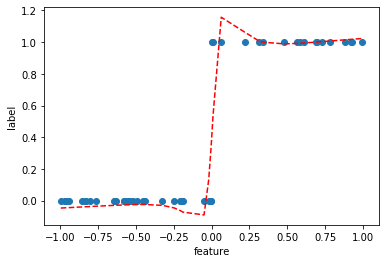

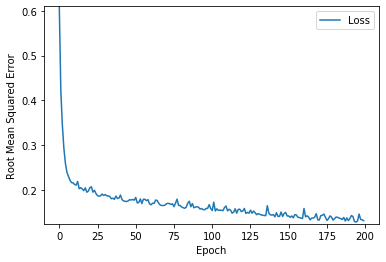

In [7]:
# Fazer previsões
preds = my_model.predict(my_feature)
preds = np.squeeze(preds)

# Ver os resultados
plot_the_model(my_feature, my_label, preds)
plot_the_loss_curve(epochs, rmse)


In [8]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3215), started 3:22:48 ago. (Use '!kill 3215' to kill it.)